# Churn Model - EDA

In [1]:
import pandas as pd
import numpy as np
import csv
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
df = pd.read_csv('week5-Churn_Dataset.csv')
df

,Cust_id,Age,LocID,GenID,RaceID,PkgID,CusCare_flag,Num_calls_Cuscare,BillCycle_ID,Mean_Mthly_Paid,...,avg_Data,avg_int_SMS,avg_int_Min,ttl_Data_last6mth,ttl_int_SMS_last6mth,ttl_int_Min_last6mth,avg_Data_last6mth,avg_int_SMS_last6mth,avg_int_Min_last6mth,churnid
0,6908fecdf3e8f8113a2350ca53ae229c075b5674,30.0,238,1,2,15,No,0,6,109.20,...,5355.21,0.0,0.0,20787.40,0,0.0,3464.57,0.0,0.0,1
1,d1199c10898d9c6ef00ecb16507edbeaaec6e41a,29.0,265,1,2,6,No,0,2,72.11,...,5864.19,0.0,0.0,34758.69,0,0.0,5793.12,0.0,0.0,1
2,2688962865d0325c5627b98caa792d8dbe57348e,29.0,240,1,1,8,No,0,1,384.42,...,24047.39,0.0,0.0,66418.99,0,0.0,11069.83,0.0,0.0,1
3,a4e38c645638fb9776b3e68cfc9c3e22cf61843f,35.0,238,1,2,12,No,0,3,245.07,...,13066.86,0.0,0.0,44537.50,0,0.0,7422.92,0.0,0.0,1
4,43f5e843b004f6590edb3da6f13843ee229fbede,38.0,234,2,1,13,No,0,7,54.61,...,1773.13,0.0,0.0,5319.38,0,0.0,1063.88,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86677,25c9fa93620bf969885a2a49456837b24471194e,43.0,237,2,1,11,No,0,6,128.98,...,5345.19,0.0,0.0,20520.46,0,0.0,5130.11,0.0,0.0,0
86678,41826064de16e670ee929b83d236a3b74e87e66e,47.0,239,1,1,273,No,0,4,60.35,...,4194.08,0.0,0.0,24418.31,0,0.0,4069.72,0.0,0.0,0
86679,cf4b4aaafec95f981e8b9cd7a4dab28848e16a2d,31.0,242,1,2,68,No,0,3,80.17,...,4574.12,0.0,0.0,34075.10,0,0.0,5679.18,0.0,0.0,0
86680,21845f8a611e028c507b0e4b3d87edb9bf9b1d5c,25.0,242,2,1,6,No,0,3,77.65,...,6922.52,0.0,0.0,30458.20,0,0.0,5076.37,0.0,0.0,0


In [3]:
#Check for missing values
df.isnull().sum()

Cust_id                                0
Age                                  934
LocID                                  0
GenID                                  0
RaceID                                 0
PkgID                                  0
CusCare_flag                           0
Num_calls_Cuscare                      0
BillCycle_ID                           0
Mean_Mthly_Paid                        0
Total_Bills                            0
Num_of_payments                        0
Timely_full_payments                   0
Delayed_Partial_Payments               0
Total_Paid_last6mth                    0
Mean_Mthly_Paid_last6mth               0
Total_Bills_last6mth                   0
Num_Payments_last6mth                  0
Timely_Full_Payments_last6mth          0
Delayed_Partial_Payments_last6mth      0
ttl_Data                               0
ttl_int_SMS                            0
ttl_int_Min                            0
avg_Data                               0
avg_int_SMS     

In [4]:
df.describe()

,Age,LocID,GenID,RaceID,PkgID,Num_calls_Cuscare,BillCycle_ID,Mean_Mthly_Paid,Total_Bills,Num_of_payments,...,avg_Data,avg_int_SMS,avg_int_Min,ttl_Data_last6mth,ttl_int_SMS_last6mth,ttl_int_Min_last6mth,avg_Data_last6mth,avg_int_SMS_last6mth,avg_int_Min_last6mth,churnid
count,85748.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.0,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,8.668200e+04,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,35.932873,238.686555,1.471747,1.620775,117.015032,0.0,4.936769,93.409494,17.355795,17.355795,...,12620.239000,0.004271,0.084840,5.472992e+05,0.016532,0.297710,12026.936463,0.002810,0.051516,0.068884
std,11.962735,8.619000,0.499204,0.806007,102.087051,0.0,2.638581,34.572663,12.055177,12.055177,...,13239.628756,0.288249,2.881531,1.173016e+06,2.103239,13.817447,13099.267643,0.350798,2.377736,0.253258
min,2.000000,231.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.610000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,233.000000,1.000000,1.000000,10.000000,0.0,3.000000,72.610000,9.000000,9.000000,...,4341.252500,0.000000,0.000000,2.192293e+04,0.000000,0.000000,3960.160000,0.000000,0.000000,0.000000
50%,34.000000,237.000000,1.000000,1.000000,89.000000,0.0,5.000000,88.410000,15.000000,15.000000,...,7475.710000,0.000000,0.000000,4.196787e+04,0.000000,0.000000,7126.525000,0.000000,0.000000,0.000000
75%,44.000000,242.000000,2.000000,2.000000,227.000000,0.0,7.000000,106.400000,23.000000,23.000000,...,16162.317500,0.000000,0.000000,3.534076e+05,0.000000,0.000000,15450.205000,0.000000,0.000000,0.000000
max,96.000000,272.000000,2.000000,4.000000,300.000000,0.0,10.000000,1458.670000,671.000000,671.000000,...,158910.110000,73.150000,389.280000,1.712881e+07,577.000000,2275.500000,325562.780000,96.170000,379.250000,1.000000


In [5]:
#churn_id=0 means not churning and churn_id = 1 is churning. 
df['churnid'].value_counts()

0    80711
1     5971
Name: churnid, dtype: int64

C:\Users\one\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churnid', ylabel='count'>

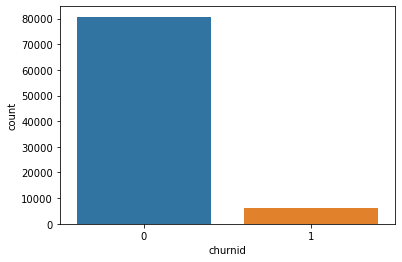

In [6]:
sns.countplot(df['churnid'])

In [7]:
num_retained = df[df.churnid == 0].shape[0]
num_churned = df[df.churnid == 1].shape[0]

print (num_retained/(num_retained + num_churned) *100, '% of customers that did not churn)
print (num_churned/(num_retained + num_churned) *100, '% of customers that churned')

93.11160333171823 % of customers that stayed within the company
6.888396668281765 % of customers that left within the company


<AxesSubplot:xlabel='GenID', ylabel='count'>

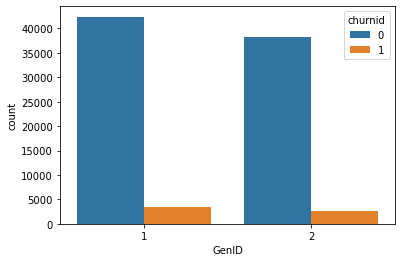

In [8]:
sns.countplot(x='GenID', hue ='churnid', data=df)

<AxesSubplot:xlabel='LocID', ylabel='count'>

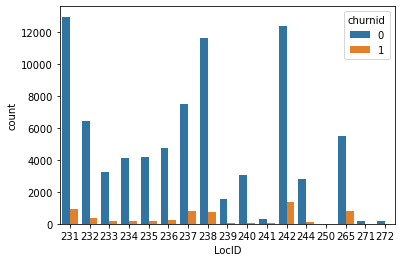

In [9]:
sns.countplot(x='LocID', hue ='churnid', data=df)

In [10]:
numerical_features = ['']

In [11]:
#Unique values
df.nunique()

Cust_id                              86682
Age                                     81
LocID                                   17
GenID                                    2
RaceID                                   4
PkgID                                  197
CusCare_flag                             1
Num_calls_Cuscare                        1
BillCycle_ID                            10
Mean_Mthly_Paid                      12906
Total_Bills                            141
Num_of_payments                        141
Timely_full_payments                    69
Delayed_Partial_Payments               139
Total_Paid_last6mth                  14499
Mean_Mthly_Paid_last6mth             11504
Total_Bills_last6mth                    70
Num_Payments_last6mth                   70
Timely_Full_Payments_last6mth           27
Delayed_Partial_Payments_last6mth       72
ttl_Data                             83661
ttl_int_SMS                             61
ttl_int_Min                            352
avg_Data   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86682 entries, 0 to 86681
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cust_id                            86682 non-null  object 
 1   Age                                85748 non-null  float64
 2   LocID                              86682 non-null  int64  
 3   GenID                              86682 non-null  int64  
 4   RaceID                             86682 non-null  int64  
 5   PkgID                              86682 non-null  int64  
 6   CusCare_flag                       86682 non-null  object 
 7   Num_calls_Cuscare                  86682 non-null  int64  
 8   BillCycle_ID                       86682 non-null  int64  
 9   Mean_Mthly_Paid                    86682 non-null  float64
 10  Total_Bills                        86682 non-null  int64  
 11  Num_of_payments                    86682 non-null  int

# Parameter Tuning

In [28]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7138780562184286

In [29]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

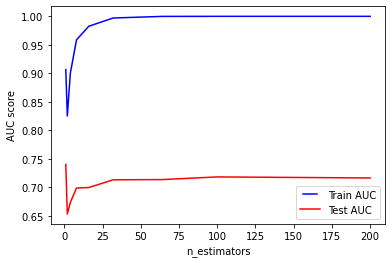

In [30]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

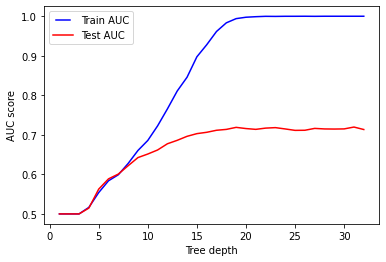

In [31]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()